In [1]:
!git clone https://github.com/atharva-diwan/ME781_course_project_grp31.git

Cloning into 'ME781_course_project_grp31'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 29 (delta 12), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
cd ME781_course_project_grp31/

/content/ME781_course_project_grp31


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Downloading big5 personality dataset

In [5]:
!gdown 'https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ'

Downloading...
From: https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ
To: /content/ME781_course_project_grp31/big_5_dataset.zip
100% 167M/167M [00:04<00:00, 39.5MB/s]


In [6]:
!unzip 'big_5_dataset.zip' -d big5_personality_dataset/

Archive:  big_5_dataset.zip
 extracting: big5_personality_dataset/IPIP-FFM-data-8Nov2018/.directory  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/sample_excel_file.xlsx  


## Loading the Data Set

In [7]:
data_raw = pd.read_csv('big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [9]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


#PCA for dimensionality reduction

#cumulative variance plot for identifying no. of components

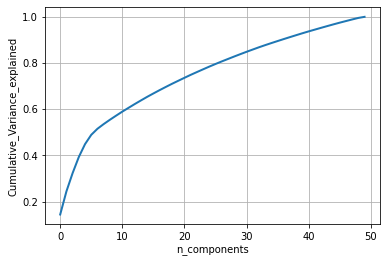

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA()  
pca.n_components=50

df_model = data.drop('country', axis=1)
scaler = StandardScaler()                      #for scaling the data
df_model = scaler.fit_transform(df_model)

pca_data=pca.fit_transform(df_model)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained') 
plt.show()

From the graph we can see that around 90% of variance is covered by 35 components

In [11]:
"""pca=PCA()  
pca.n_components=50
pca_data=pca.fit_transform(df_model) """ 
# look at explained variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index+1,np.round(var,3)))
   

if n_components= 1,   variance=14.390000
if n_components= 2,   variance=24.390000
if n_components= 3,   variance=32.330000
if n_components= 4,   variance=39.320000
if n_components= 5,   variance=44.880000
if n_components= 6,   variance=48.910000
if n_components= 7,   variance=51.530000
if n_components= 8,   variance=53.550000
if n_components= 9,   variance=55.420000
if n_components= 10,   variance=57.200000
if n_components= 11,   variance=58.950000
if n_components= 12,   variance=60.590000
if n_components= 13,   variance=62.230000
if n_components= 14,   variance=63.800000
if n_components= 15,   variance=65.350000
if n_components= 16,   variance=66.810000
if n_components= 17,   variance=68.250000
if n_components= 18,   variance=69.640000
if n_components= 19,   variance=71.000000
if n_components= 20,   variance=72.300000
if n_components= 21,   variance=73.600000
if n_components= 22,   variance=74.870000
if n_components= 23,   variance=76.070000
if n_components= 24,   variance=77.270000
i

From the table we can see that around 90% variance is covered by 36 components

# Applying PCA with no. of components as 36

In [12]:
no_of_components = 36
pca = PCA(n_components=no_of_components)
pca_fit = pca.fit_transform(df_model)
df_pca_fit = pd.DataFrame(pca_fit) #converting array to dataframe
df_pca_fit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-4.285805,-0.119128,1.935723,-1.500696,0.124641,0.494114,0.592330,-0.131642,-0.401772,0.649040,0.442259,-0.142172,-0.048485,1.112144,-0.551037,-0.231362,0.562670,-0.807316,-0.321941,-0.138534,-0.299861,-0.504770,-0.665179,-0.051475,-0.179241,0.399907,0.243456,-0.203701,-0.316114,0.517799,-0.026746,0.356280,0.009646,0.109071,-0.084199,0.561982
1,0.436313,1.336246,-2.355977,2.113397,-2.369208,-0.226991,-1.518749,0.352671,-1.201706,0.179918,0.115151,-0.440322,-0.760715,-0.299148,-0.099359,0.321229,1.219434,-0.183778,0.708837,-0.569155,-0.142662,0.971354,0.113121,-0.201298,-1.129558,0.237998,1.051554,-1.066557,1.090615,0.075207,0.675836,0.649517,0.181013,-0.254736,-0.190080,-1.410160
2,-0.550440,1.329258,-1.163816,0.304400,-2.137426,1.152058,1.422278,0.478052,0.786568,-0.043919,-0.134144,-0.387047,0.494860,0.759202,-0.644242,-1.363280,1.602511,0.912181,-0.807533,-0.851398,-0.466794,-0.846879,0.188945,0.285437,0.197732,0.031557,-1.184496,0.062464,0.422567,0.043604,-0.302352,0.742272,0.024966,0.032127,-0.232984,-0.034930
3,0.953149,0.196152,1.427501,-0.729327,-2.097310,0.414403,0.295393,-0.639508,-0.359595,-0.520485,0.346538,1.568188,-1.017986,-0.294219,0.994661,0.568638,-0.386993,-0.626099,0.921702,1.352739,-0.634293,-0.351143,0.033538,-0.093212,-0.842713,0.197031,-0.359837,-0.149407,-0.228185,-0.376349,0.512741,0.144792,-0.264713,-0.572700,0.361449,-0.330209
4,-4.061481,0.934160,-4.297905,-0.945673,-0.943068,0.218482,-0.078547,-0.251720,-1.406797,-0.493861,-0.283426,0.205944,0.108377,0.079172,-0.337093,-0.271579,0.515783,0.006184,0.155179,-0.360952,0.403489,0.068292,-0.089470,0.081193,-0.136847,1.086868,0.709906,0.251578,0.420598,1.399556,-0.331792,0.530912,-0.772401,0.501952,-0.254470,0.664094
